./slurm_scripts/submit.sh  scripts/run_fineweb1B_adam_fista.sh param_configs/attn_fista_rho_mu_sweep.json small_fista  16

In [1]:
from sweep_utils import *

In [2]:
param_configs = "../param_configs/adamw_kq_all_lr.json"
script_name = "../scripts/run_fineweb1B_adam.sh"

df, _ = load_sweep_jsons(param_configs, script_name)

In [3]:
# d_conf = {model_name: (param_configs, list_scripts)}
d_conf = {
        #   "fista_st100_bv": ("../param_configs/attn_fista_rhomu_best1_lr_sweep.json" ,
        #                    "../scripts/run_fineweb1B_adam_fista.sh"),
        #   "fista_st50_bv": ("../param_configs/attn_fista_rhomu_best3_lr_sweep.json" ,
        #                    "../scripts/run_fineweb1B_adam_fista.sh"),
          "fista_st20_bv": ("../param_configs/attn_fista_rhomu_best5_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista.sh"),
          "fista_st20_bkq": ("../param_configs/attn_fista_rhomu_best5p75_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista.sh"),
          "fista_st20_bv_m": ("../param_configs/attn_fista_rhomu_best6_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
          "fista_st20_bkq_m": ("../param_configs/attn_fista_rhomu_best7_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
          "fista_st20_bv_mv": ("../param_configs/attn_fista_rhomu_best8_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
          "fista_st20_bkq_mv": ("../param_configs/attn_fista_rhomu_best9_lr_sweep.json" ,
                           "../scripts/run_fineweb1B_adam_fista_momentum.sh"),
                           }

df_fista, _ = load_sweep_jsons_all(d_conf)

In [4]:
df = pd.concat([df, df_fista], ignore_index=True)
len(df)

98

In [5]:
df[:3]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,lr,model,wd,script,attn_max_iter,attn_momentum,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.373496,4.363170,4.363170,26.75,22.875,22.623992,0.0001,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.621689,4.611256,4.611256,50.00,50.000,49.957093,0.005,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,13.480243,12.252939,16.513472,50.00,50.000,49.974997,0.5,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df["lr"]=='0.001'][["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
10,gpt-small-softcap,3.993957,50.000,0.001
21,gpt-small-lnorm,3.949166,17.125,0.001
32,gpt-small-w-clip,3.981357,109.000,0.001
43,gpt-small-default,3.988897,318.000,0.001
56,fista_st20_bkq_m,4.758358,16.625,0.001
57,fista_st20_bkq_mv,4.708824,20.250,0.001
58,fista_st20_bv,3.978792,1536.000,0.001
59,fista_st20_bv_m,4.015273,4000.000,0.001
60,fista_st20_bkq,4.820639,16.250,0.001
61,fista_st20_bv_mv,3.964207,804.000,0.001


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

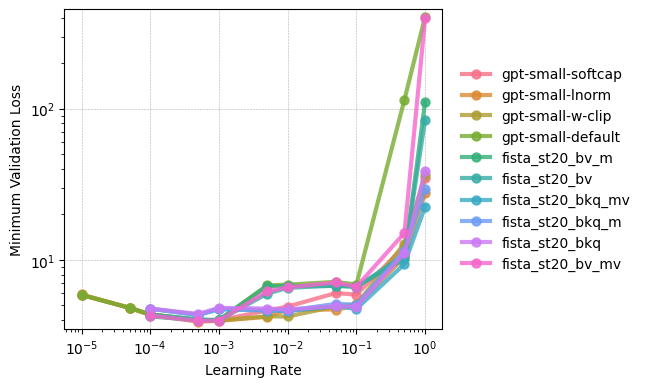

In [7]:
plot_lr_sweep_over_models(df, ycol="min_val_loss", ylog=True)

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:715: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ymin / (10 ** pad), ymax * (10 ** pad))


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

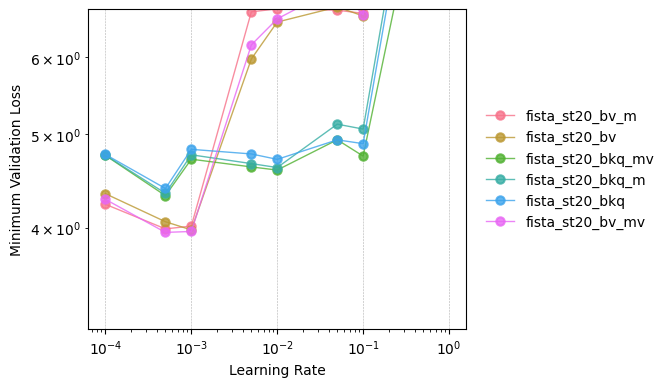

In [8]:
plot_lr_sweep_over_models(df[df["model"].str.contains("fista_st20")], ycol="min_val_loss", ylog=True, linewidth=1,
                          ylim=(0, 6))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

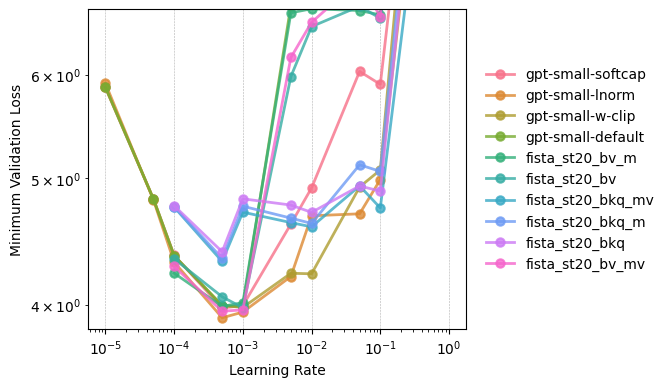

In [9]:
plot_lr_sweep_over_models(df, ycol="min_val_loss", ylog=True, linewidth=2, ylim=(4.3, 6))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

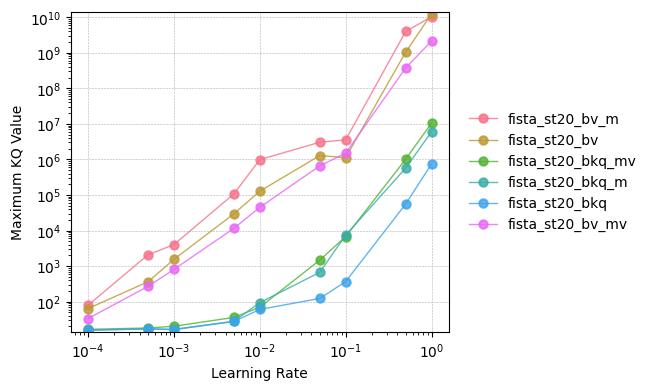

In [10]:
plot_lr_sweep_over_models(df[df["model"].str.contains("fista_st20")], ycol="kq_max", ylog=True,
                          alpha=0.8, linewidth=1.0)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

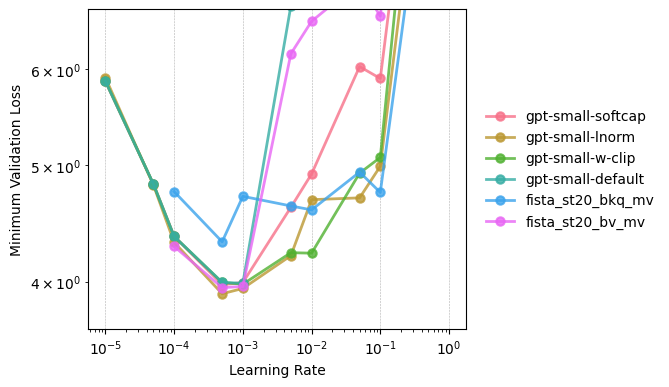

In [11]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                               'gpt-small-default', 
                                               'fista_st20_bkq_mv', 'fista_st20_bv_mv'])], ycol="min_val_loss", ylog=True, linewidth=2, ylim=(4.1, 6))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

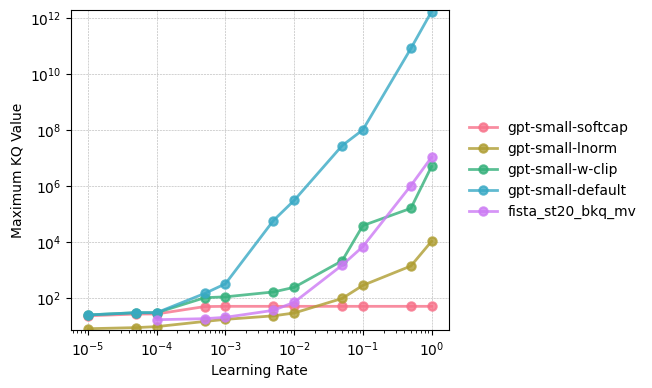

In [12]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                               'gpt-small-default', 
                                               'fista_st20_bkq_mv'])], ycol="kq_max", ylog=True, linewidth=2)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

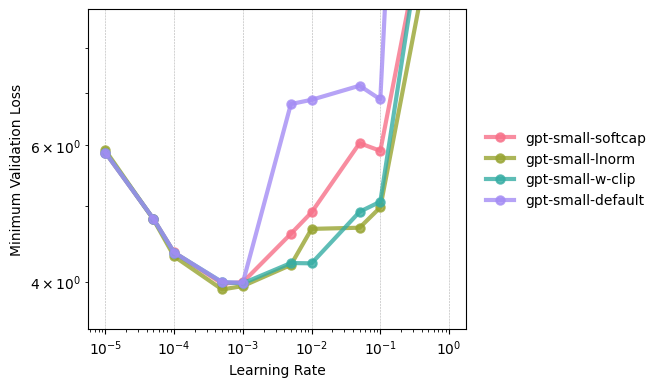

In [13]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                               'gpt-small-default'])], ycol="min_val_loss", ylog=True,
                                               ylim=(3.9, 8.))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

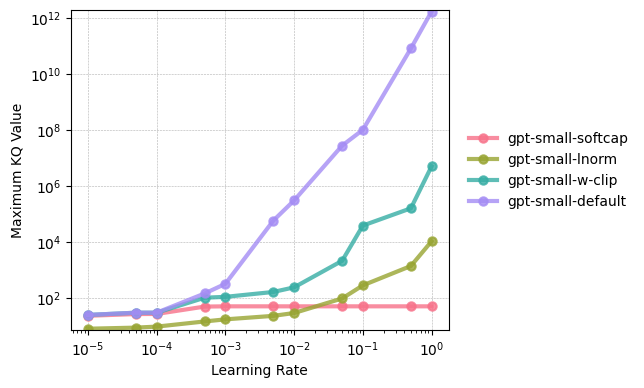

In [14]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                               'gpt-small-default'])], ycol="kq_max", ylog=True,)

In [15]:
df[df["lr"].isin(['0.1', '0.5', '1.0'])][df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
                                               'gpt-small-default'])][["model", "min_val_loss", "kq_max", "lr"]]

/tmp/ipykernel_2701291/214968256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["lr"].isin(['0.1', '0.5', '1.0'])][df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip',


,model,min_val_loss,kq_max,lr
2,gpt-small-softcap,12.252939,5.000000e+01,0.5
7,gpt-small-softcap,5.896888,5.000000e+01,0.1
8,gpt-small-softcap,35.013920,5.000000e+01,1.0
13,gpt-small-lnorm,10.458821,1.376000e+03,0.5
18,gpt-small-lnorm,4.987054,2.800000e+02,0.1
19,gpt-small-lnorm,27.809307,1.049600e+04,1.0
24,gpt-small-w-clip,12.817272,1.576960e+05,0.5
29,gpt-small-w-clip,5.071876,3.814400e+04,0.1
30,gpt-small-w-clip,36.241512,4.947968e+06,1.0
35,gpt-small-default,114.613625,7.999377e+10,0.5


In [16]:
df.loc[df[df["model"].isin(['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 
  'gpt-small-default'])]["min_val_loss"].idxmin()].to_frame().T[["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
15,gpt-small-lnorm,3.90963,14.4375,0.0005


In [17]:
models = ['gpt-small-softcap', 'gpt-small-lnorm', 'gpt-small-w-clip', 'gpt-small-default']

sub = df[df["model"].isin(models)]
best_per_model = sub.loc[sub.groupby("model")["min_val_loss"].idxmin(), ["model", "min_val_loss", "kq_max", "lr"]]
best_per_model

,model,min_val_loss,kq_max,lr
43,gpt-small-default,3.988897,318.0000,0.001
15,gpt-small-lnorm,3.909630,14.4375,0.0005
4,gpt-small-softcap,3.978091,49.0000,0.0005
32,gpt-small-w-clip,3.981357,109.0000,0.001
